# Problem 2

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
area_acres = 160
area_ft2 = area_acres * 43560
drainage_radius_feet = (area_ft2/np.pi)**(0.5)
wellbore_radius_ft = 0.3
vertical_horizontal_permeability_ratio = 1
horizontal_permeability_md = np.array([1,10])
height_ft = np.array([35,100,165])
kfbf = np.array([118,230,984,4312])
viscosity_cp = 0.7
formation_volume_factor_rb_per_stb = 1.34
length_ft = np.linspace(250, 2000, 2001)
anisotropic_factor = np.sqrt((vertical_horizontal_permeability_ratio)**(-1))

Modifications for horizontal fracture

$ r_w' = 0.2807\frac{k_fb_f}{k}$

In [77]:
## Compute productivity

def productivity(horizontal_permeability_md, height_ft, formation_volume_factor_rb_per_stb, viscosity_cp, length_problem_1, anisotropic_factor, wellbore_radius_ft, delta,value, kfbf, drainage_radius_ft):
   
    #Compute a
    
    if value == 0:
    
        a_part_1 = drainage_radius_ft/(length_problem_1/2)
        a = (length_problem_1/2)*(0.5+(0.25+(a_part_1**4))**0.5)**0.5
        
    if value ==1:
        
        a = length_problem_1/2
        
    else: 
        a_part_1 = drainage_radius_ft/(length_problem_1/2)
        a = (length_problem_1/2)*(0.5+(0.25+(a_part_1**4))**0.5)**0.5
        wellbore_radius_ft = 0.2807*kfbf/horizontal_permeability_md
    
    #Compute entire equation
    
    numerator = horizontal_permeability_md * height_ft
    denominator_part_1 = 141.2*formation_volume_factor_rb_per_stb * viscosity_cp
    denominator_part_2 = np.log((a + np.sqrt((a**2)-(length_problem_1/2)**2))/(length_problem_1/2))
    denominator_part_3 = (anisotropic_factor * height_ft)/length_problem_1
    denominator_part_4 = np.log(((anisotropic_factor*height_ft/2)**2+(anisotropic_factor*delta)**2)/(wellbore_radius_ft*anisotropic_factor*height_ft/2))
    well_productivity = numerator/(denominator_part_1 *(denominator_part_2+denominator_part_3*denominator_part_4))
    
    return well_productivity

In [78]:
def vertical_productivity_function(viscosity_cp, permeability_md, height_ft, formation_volume_factor_rb_per_stb, wellbore_radius_ft, drainage_radius_ft):
    productivity = permeability_md*height_ft/(141.2*formation_volume_factor_rb_per_stb*viscosity_cp * np.log(drainage_radius_ft/wellbore_radius_ft))
    return productivity

Create Plots

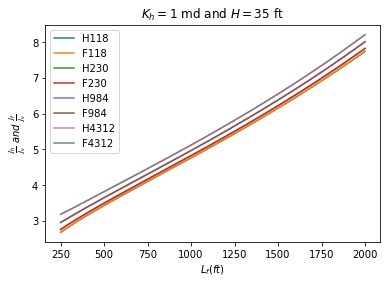

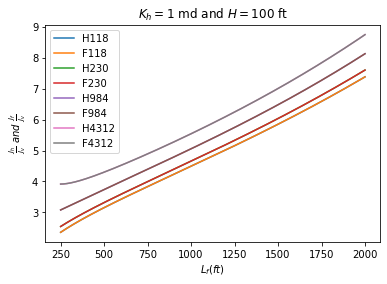

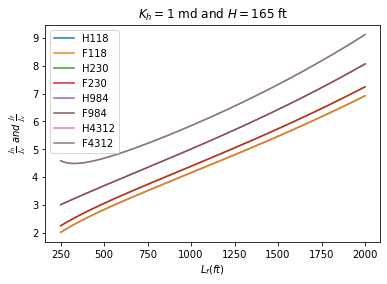

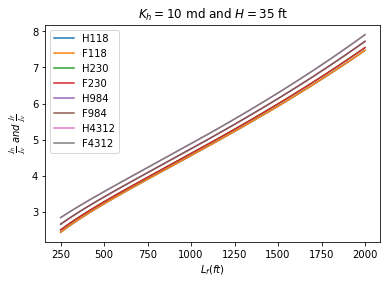

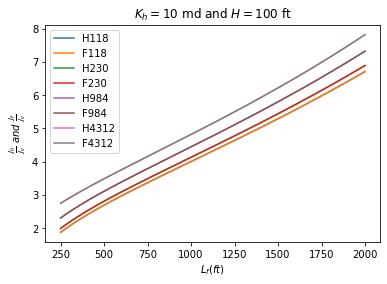

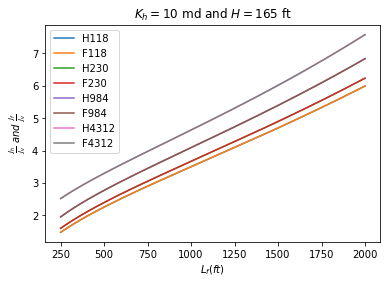

In [86]:
plot_number = 0

for i in horizontal_permeability_md:
    
    for j in height_ft:
        plt.figure(plot_number)
        plt.title(r"$K_h = $" +  str(i) + " md and " + r"$ H = $" + str(j) + " ft")
        plt.ylabel(r"$\frac{J_h}{J_v} \ and \ \frac{J_f}{J_v}$")
        plt.xlabel(r"$L_f (ft)$")
        
        fracture_ratio = np.zeros([length_ft.size, kfbf.size])
        horizontal_ratio = np.zeros([length_ft.size, kfbf.size])
        
        iteration = 0 
        
        for k in kfbf:
            
            vertical_productivity = vertical_productivity_function(viscosity_cp, \
                                                                   i, \
                                                                   j, \
                                                                   formation_volume_factor_rb_per_stb, \
                                                                   wellbore_radius_ft, \
                                                                   drainage_radius_feet)

            
            horizontal_ratio[:,iteration] = productivity(i, j, formation_volume_factor_rb_per_stb, \
                                                  viscosity_cp, length_ft, \
                                                  anisotropic_factor, wellbore_radius_ft, \
                                                  j/2, 0, k, drainage_radius_feet)/vertical_productivity
            
            fracture_ratio[:,iteration] = productivity(i, j, formation_volume_factor_rb_per_stb, \
                                                  viscosity_cp, length_ft, \
                                                  anisotropic_factor, wellbore_radius_ft, \
                                                  j/2, 2, k, drainage_radius_feet)/vertical_productivity
         
            iteration += 1
        
        iteration = 0 
        
        for k in kfbf: 
            plt.plot(length_ft, horizontal_ratio[:,iteration], label = "H" + str(k))
            plt.plot(length_ft, fracture_ratio[:,iteration], label= "F" + str(k))
            plt.legend()
            plot_number += 1
            iteration += 1
            
        
        
        